In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/raw/uk-war.csv", names=["date","time","location","lat","lon","kind","description","link"])

df

,date,time,location,lat,lon,kind,description,link
0,03/01,0040,SW Kherson,46.593879,32.571234,Ua hoisted flag,Ukrainians hoisted flag,https://twitter.com/fdov21/status/161004131337...
1,03/01,0855,SE of Pavlivka,47.739985,37.242889,Ru Position,Russian infantry shelled by Ukrainians,https://twitter.com/neonhandrail/status/161016...
2,03/01,1240,Ru units,46.687000,33.124000,BARS-4 still in Kherson,BARS-4 still in Kherson,https://twitter.com/Danspiun/status/1609996961...
3,03/01,1250,Bakhmut,48.576680,38.034390,Ru Position,71st Jaeger shelling Russian positions at Bakhmut,https://twitter.com/Danior61/status/1610237421...
4,03/01,1250,Pavlivka,47.751306,37.235094,Ru Position x 2,Russian positions shelled in Pavlivka,https://twitter.com/neonhandrail/status/161015...
...,...,...,...,...,...,...,...,...
158,16/01,2250,S of Vodyane,48.084610,37.666280,Ru Position,BMP struck by Stugna by 59th mechanized brigad...,https://twitter.com/blinzka/status/16151024117...
159,17/01,0225,W of Dibrova,49.022494,38.051074,Ru Position,80th air assault brigade shells Russian positi...,https://twitter.com/blinzka/status/16151410616...
160,17/01,1045,Verkhnokamyanske,48.866203,38.228681,Ru Position,Ua drone sneakily steals Russian radio,https://twitter.com/neonhandrail/status/161521...
161,17/01,1100,Novoselivske,49.525926,37.956265,Ua Position,Ukrainian troops use tank wreck as cover durin...,https://twitter.com/Sagakino1/status/161476698...


In [22]:
df.dropna(axis=0,how='any',subset=['lat','lon'],inplace=True)

In [23]:
# Variable with the Longitude and Latitude
X=df.loc[:,['kind','lat','lon']]
X = X[X.columns[1:3]][X.columns[1:3]][X["kind"].str.contains("Ua") == False]
X = Y[Y["kind"].str.contains("UA") == False]
X["kind"].info()

<class 'pandas.core.series.Series'>
Int64Index: 101 entries, 1 to 162
Series name: kind
Non-Null Count  Dtype 
--------------  ----- 
101 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


For n_clusters = 5 The average silhouette_score is : 0.6732512382731718
For n_clusters = 6 The average silhouette_score is : 0.684744559212563
For n_clusters = 7 The average silhouette_score is : 0.6748955417298349
For n_clusters = 8 The average silhouette_score is : 0.6345451215251992


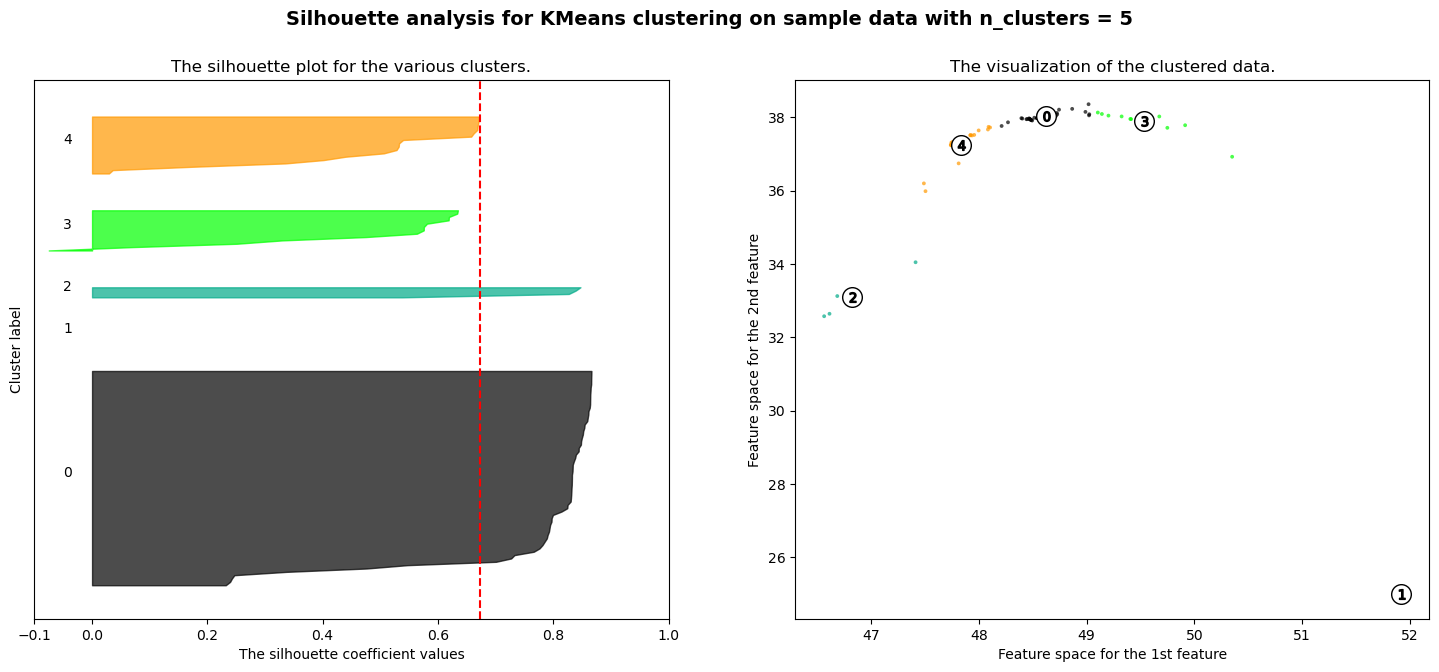

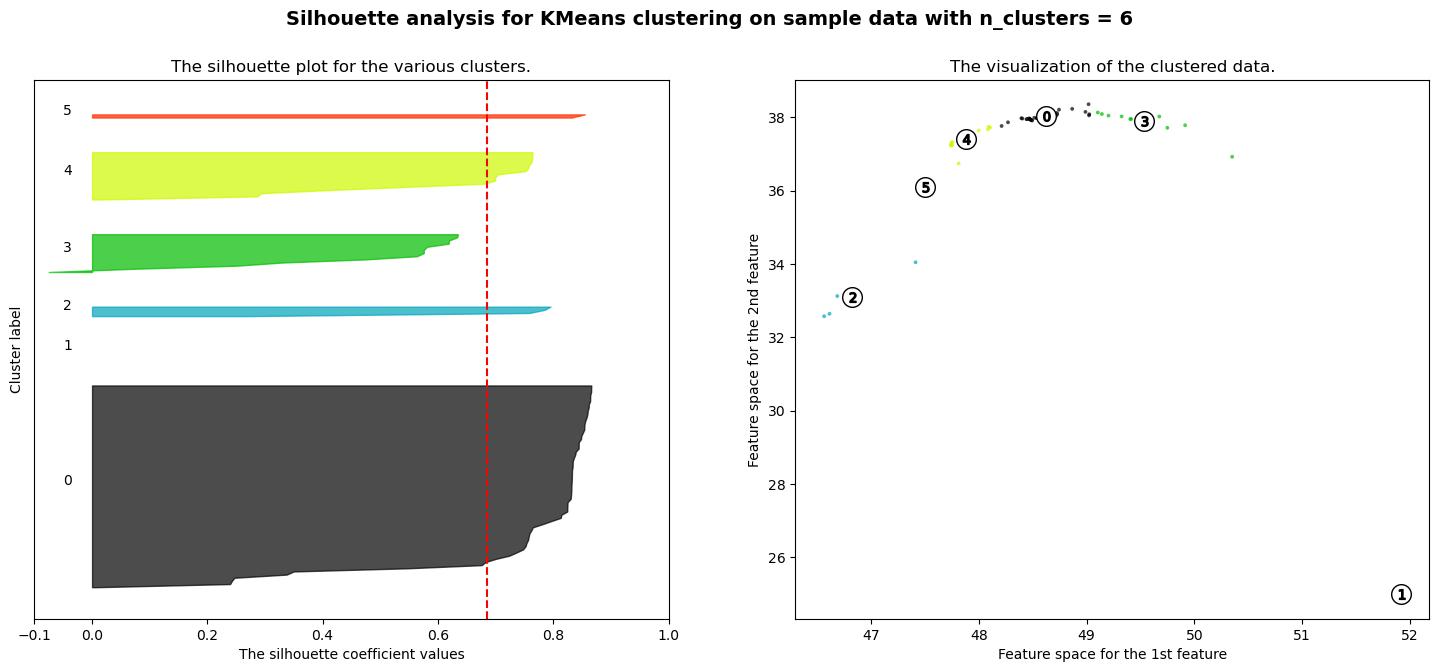

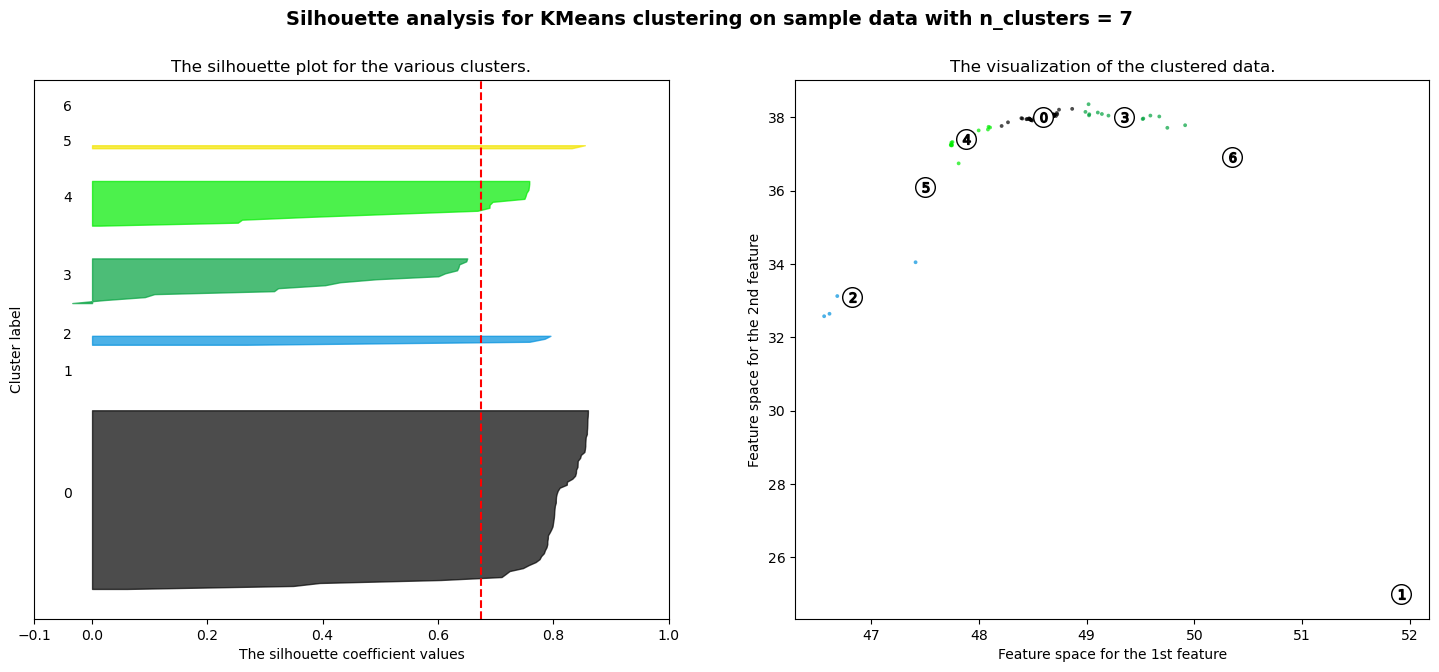

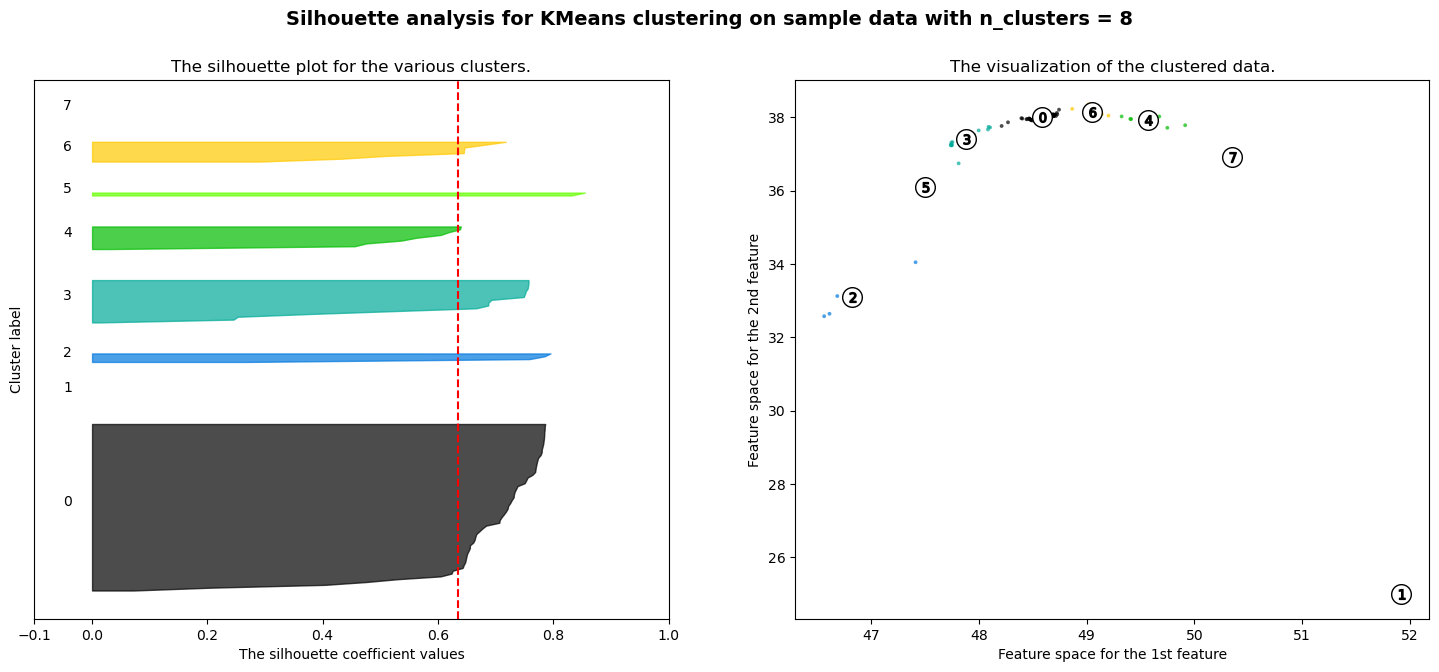

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X[X.columns[1:3]]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X[X.columns[1:3]])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X[X.columns[1:3]], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X[X.columns[1:3]], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[X.columns[1]],X[X.columns[2]], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [39]:
Y=df.loc[:,['kind','lat','lon']]
Y = Y[Y["kind"].str.contains("Ru") == False]
Y = Y[Y["kind"].str.contains("RU") == False]
Y["kind"].info()

<class 'pandas.core.series.Series'>
Int64Index: 62 entries, 0 to 161
Series name: kind
Non-Null Count  Dtype 
--------------  ----- 
62 non-null     object
dtypes: object(1)
memory usage: 992.0+ bytes


For n_clusters = 5 The average silhouette_score is : 0.5004609521935555
For n_clusters = 6 The average silhouette_score is : 0.6625734860351838
For n_clusters = 7 The average silhouette_score is : 0.626529039901487
For n_clusters = 8 The average silhouette_score is : 0.6029893159550967


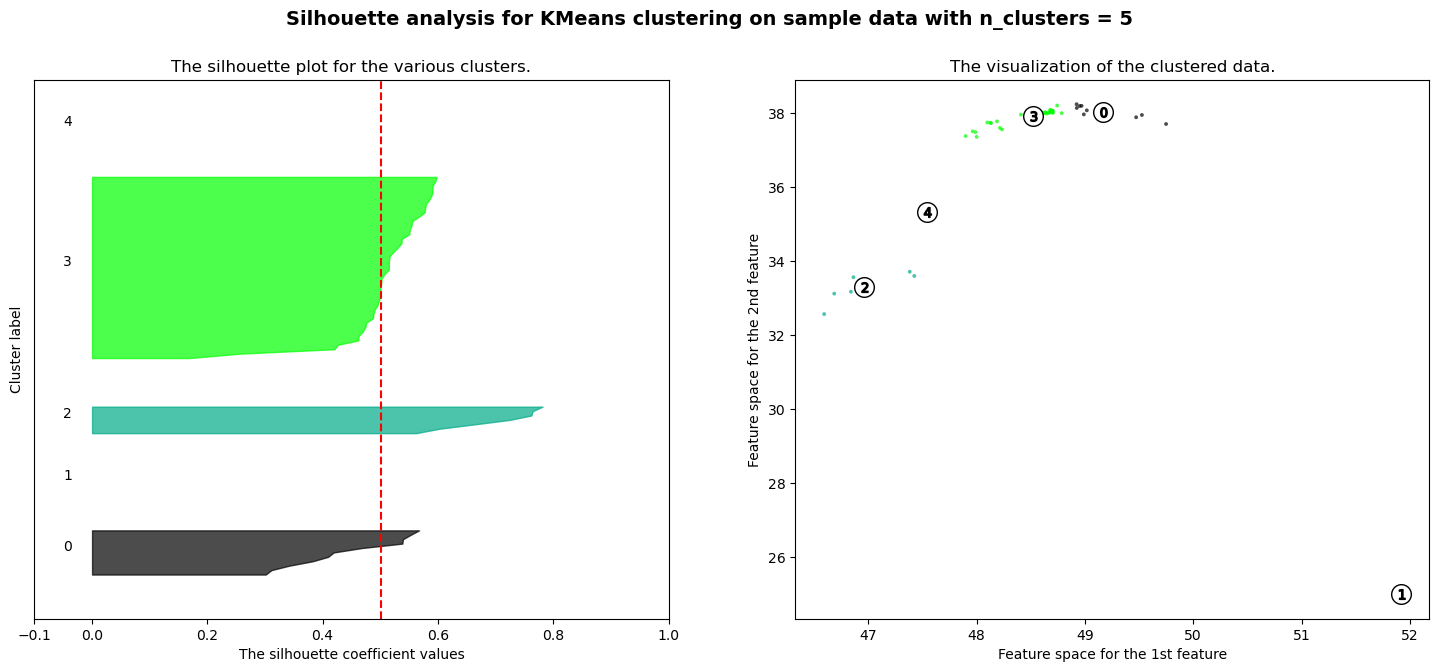

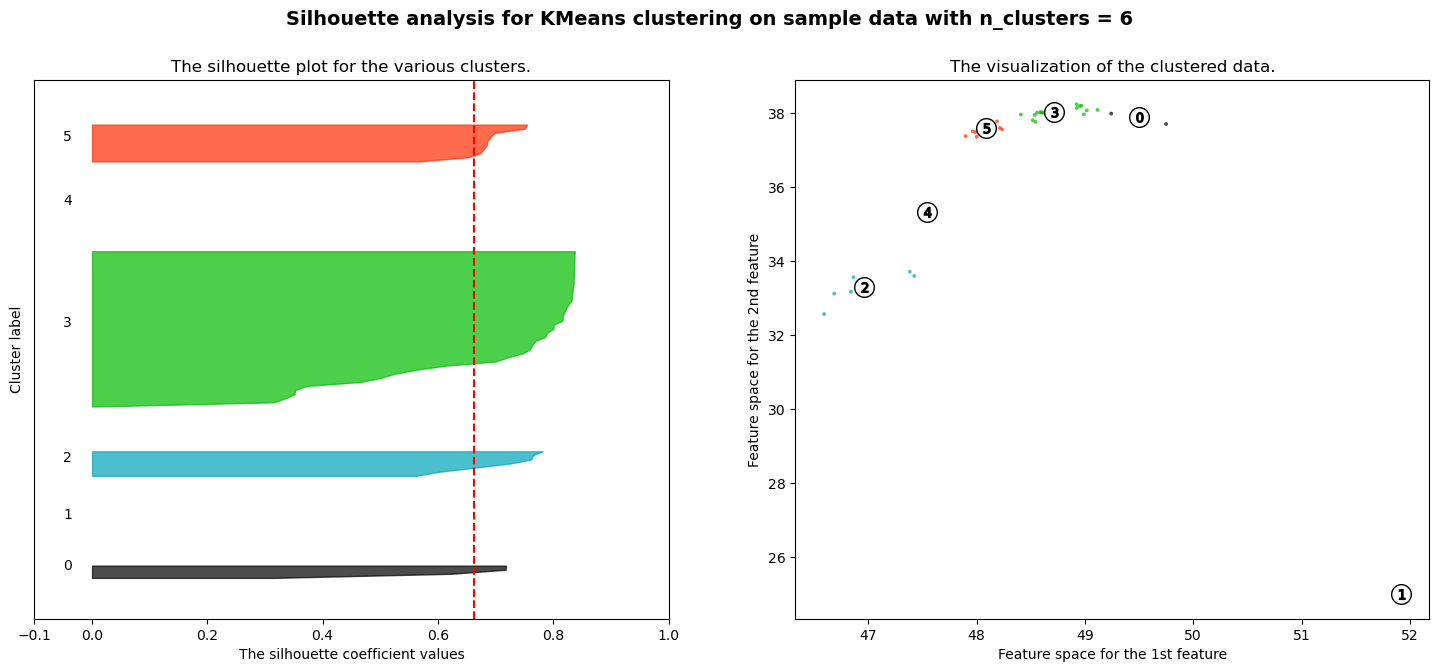

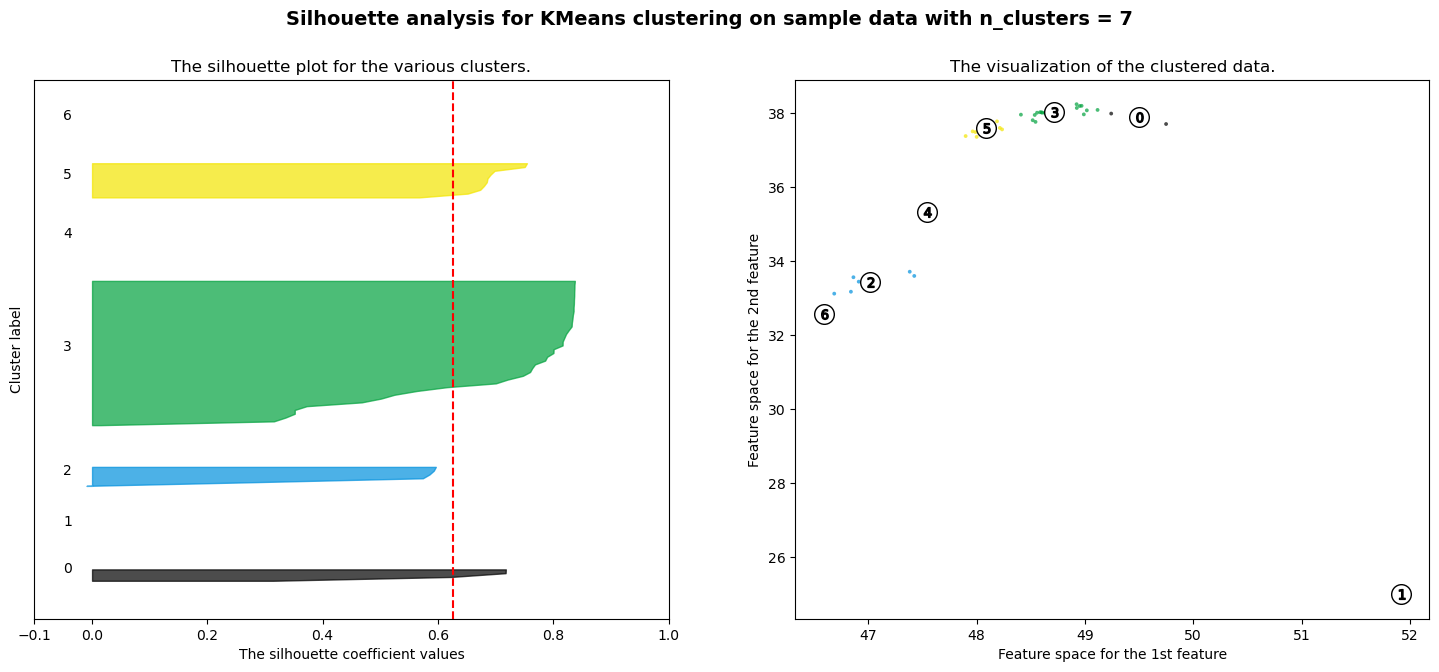

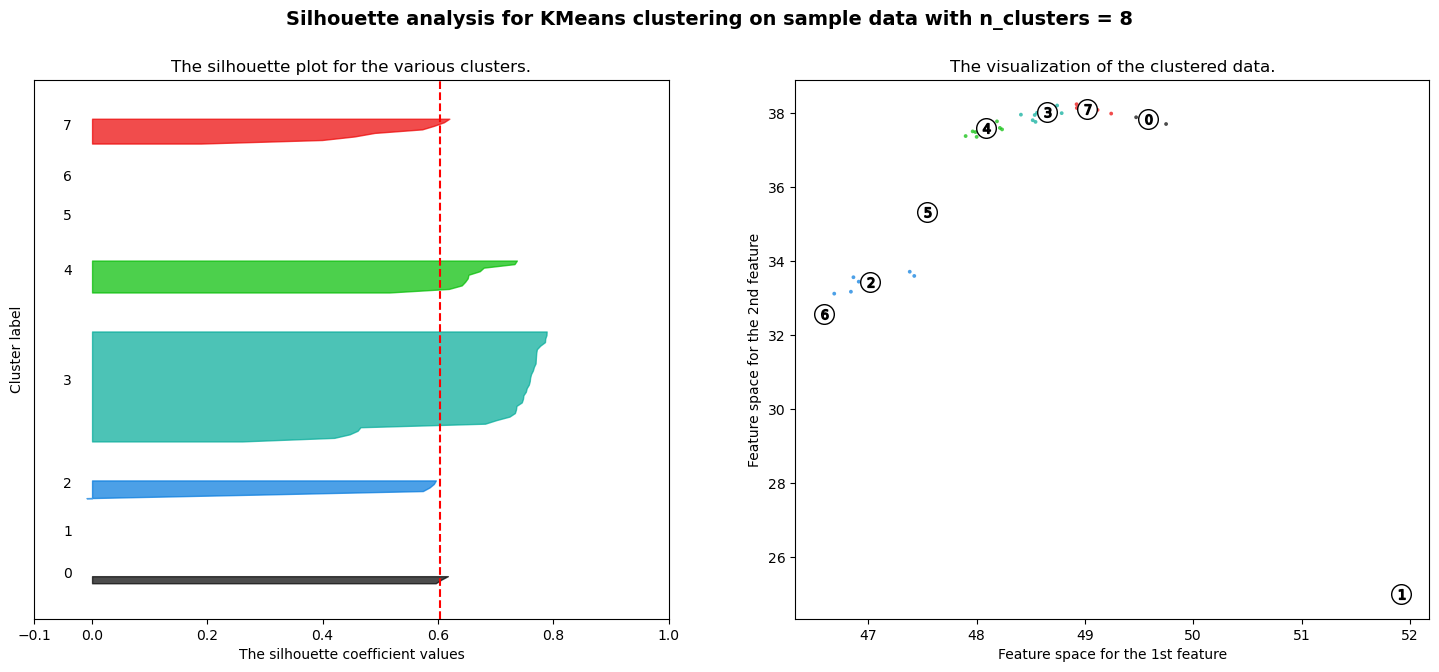

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Y[Y.columns[1:3]]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(Y[Y.columns[1:3]])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y[Y.columns[1:3]], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y[Y.columns[1:3]], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        Y[Y.columns[1]],Y[Y.columns[2]], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [5]:
BBox = ((df.lon.min(),   df.lon.max(),
        df.lat.min(), df.lat.max()))
BBox

(24.993662, 38.355197, 46.565222, 51.912824)

In [6]:
ruh_m = plt.imread('map.jpeg')

/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The defaul

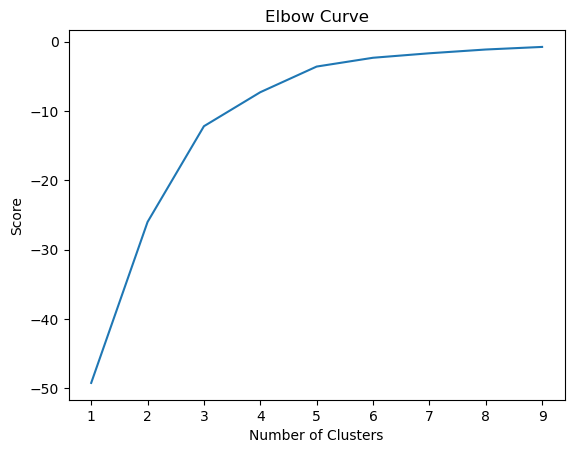

In [7]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = X[['lat']]
X_axis = X[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The defaul

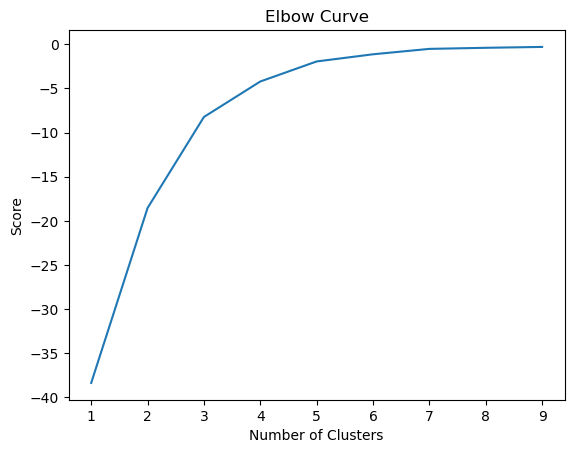

In [8]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = Y[['lat']]
X_axis = Y[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 7, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,kind,lat,lon,cluster_label
1,Ru Position,47.739985,37.242889,6
2,BARS-4 still in Kherson,46.687000,33.124000,3
3,Ru Position,48.576680,38.034390,2
4,Ru Position x 2,47.751306,37.235094,6
7,Ru Position and presence adjust,48.090561,37.738456,6
9,Ru Position,48.481492,37.932841,2
12,Ru Position,48.471386,37.960398,2
13,Ru Position and Tsunami moved,47.505410,35.983938,0
14,Ru Position,49.914065,37.782206,5
15,Ru Position,48.487650,37.921600,2


In [10]:
kmeans = KMeans(n_clusters = 7, init ='k-means++')
kmeans.fit(Y[Y.columns[1:3]]) # Compute k-means clustering.
Y['cluster_label'] = kmeans.fit_predict(Y[Y.columns[1:3]])
y_centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
y_labels = kmeans.predict(Y[Y.columns[1:3]]) # Labels of each point
Y.head(10)

/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,kind,lat,lon,cluster_label
0,Ua hoisted flag,46.593879,32.571234,1
2,BARS-4 still in Kherson,46.687000,33.124000,1
8,Ua Position,48.558250,38.017462,4
10,Ua Position,48.989912,37.972644,4
11,Ua Position x 2 and presence adjust,49.017700,38.081700,4
17,Ua Position,48.127830,37.743780,0
19,Hornet Unit added and 214th OPFOR moved to Bak...,48.632190,38.002280,4
20,100th TDF position,51.912824,24.993662,2
23,Ua Position,46.840898,33.176295,1
24,67th Mechanized moved,49.748920,37.712140,3


In [11]:
y_labels = [x+7 for x in y_labels]

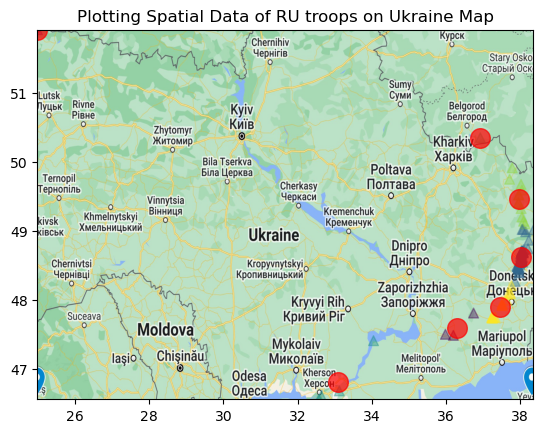

In [12]:
fig, ax = plt.subplots()
ax.scatter(X.lon, X.lat, c=labels, s=50, zorder=1, alpha= 0.4, marker='^',cmap='viridis')
ax.scatter(centers[:, 1],centers[:, 0], c='red', s=200, alpha=0.7)
ax.set_title('Plotting Spatial Data of RU troops on Ukraine Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')

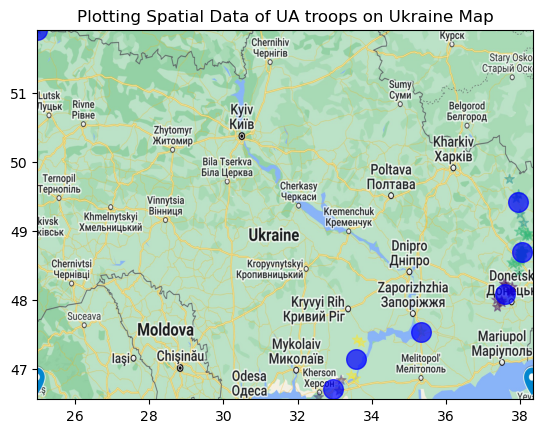

In [13]:
fig, ax = plt.subplots()
ax.scatter(Y.lon, Y.lat, c=y_labels, s=50, zorder=1, alpha= 0.4, marker='*',cmap='viridis')
ax.scatter(y_centers[:, 1],y_centers[:, 0], c='blue', s=200, alpha=0.7)
ax.set_title('Plotting Spatial Data of UA troops on Ukraine Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')

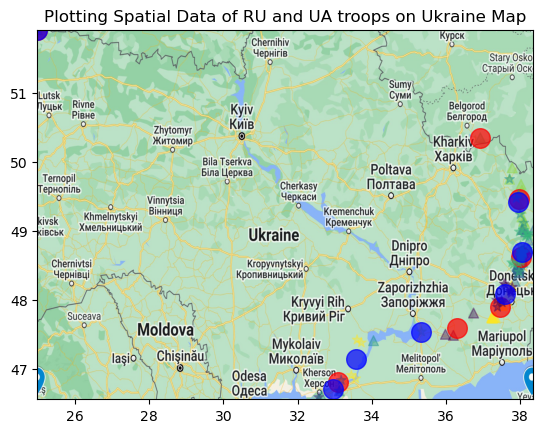

In [14]:
fig, ax = plt.subplots()
ax.scatter(X.lon, X.lat, c=labels, s=50, zorder=1, alpha= 0.4, marker='^',cmap='viridis')
ax.scatter(centers[:, 1],centers[:, 0], c='red', s=200, alpha=0.7)
ax.scatter(Y.lon, Y.lat, c=y_labels, s=50, zorder=1, alpha= 0.4, marker='*',cmap='viridis')
ax.scatter(y_centers[:, 1],y_centers[:, 0], c='blue', s=200, alpha=0.7)
ax.set_title('Plotting Spatial Data of RU and UA troops on Ukraine Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')